In [373]:
import pandas as pd
import numpy as np

In [374]:
df = pd.read_csv('Data/Discontinaunce_of_PEVs_in_California_Data_2021.03.01.csv')

In [375]:
df.head()

,"﻿""id. Response ID""",Electric driving range,oldcartype,Discontinuance (inc. purchased lease) 2,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,...,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)",Survey_completion
0,1.0,81.0,PHEV,Continued,25.0,Male,13.92,0.0,5.0,5.0,...,5.0,5.0,5.0,"$150,000 to $199,999",No Charging,No charging,Level 2,25.0,1.0,40.0
1,2.0,310.0,BEV,Original,35.0,Male,10.25,7.0,5.0,5.0,...,5.0,5.0,5.0,NaN,Level 2,DC Fast,No charging,NaN,0.0,37.0
2,3.0,53.0,PHEV,Original,45.0,Male,NaN,2.0,3.0,4.0,...,2.0,2.0,3.0,"$200,000 to $249,999",No Charging,Level 2,No charging,27.0,1.0,40.0
3,4.0,271.0,BEV,Original,45.0,Male,8.68,1.0,5.0,5.0,...,5.0,4.0,4.0,I prefer not to answer,Level 2,No charging,No charging,24.0,0.0,40.0
4,5.0,84.0,BEV,Original,65.0,Male,NaN,0.0,5.0,5.0,...,5.0,4.0,5.0,"$200,000 to $249,999",Level 2,Level 2,No charging,24.0,1.0,40.0


In [376]:
df.columns

Index(['﻿"id. Response ID"', 'Electric driving range', 'oldcartype',
       'Discontinuance (inc. purchased lease) 2', 'Age', 'Gender',
       'Oneway_commute_dist', 'Long_trip_num', 'Safety',
       'Refuelling/Recharging costs', 'Environmental impacts', 'Reliability',
       'Electric driving range.1', 'Convenience of charging',
       'Household_income', 'Home Charging (L1, L2, None)',
       'Work charging (L1, L2, DC, none)', 'Public charging', 'Second_vehicle',
       'Lease (1 lease, 0 other)', 'Survey_completion'],
      dtype='object')

# NaN value Handling

In [377]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [378]:
missing_values_table(df)

Your selected dataframe has 21 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
"Work charging (L1, L2, DC, none)",1661,34.4
Public charging,1282,26.5
Second_vehicle,1046,21.6
Oneway_commute_dist,1024,21.2
Household_income,747,15.4
Environmental impacts,689,14.3
Safety,689,14.3
Refuelling/Recharging costs,689,14.3
Reliability,689,14.3
Electric driving range.1,689,14.3


In [379]:
df['Discontinuance (inc. purchased lease) 2'].value_counts()

Original        2886
Continued       1530
Discontinued     417
Name: Discontinuance (inc. purchased lease) 2, dtype: int64

<AxesSubplot:xlabel='Discontinuance (inc. purchased lease) 2', ylabel='count'>

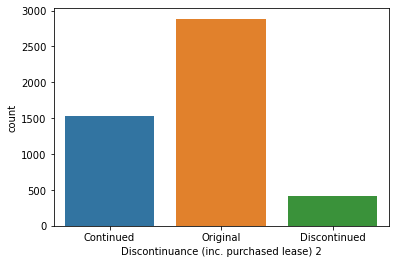

In [380]:
import seaborn as sns
y = df['Discontinuance (inc. purchased lease) 2']
sns.countplot(x = y, data = df)

In [381]:
#dropping discontinuance = original rows
df_cpy = df.copy()
df.drop(df.index[df['Discontinuance (inc. purchased lease) 2'] == 'Original'], inplace = True)
df.head()

,"﻿""id. Response ID""",Electric driving range,oldcartype,Discontinuance (inc. purchased lease) 2,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,...,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)",Survey_completion
0,1.0,81.0,PHEV,Continued,25.0,Male,13.92,0.0,5.0,5.0,...,5.0,5.0,5.0,"$150,000 to $199,999",No Charging,No charging,Level 2,25.0,1.0,40.0
6,7.0,87.0,BEV,Continued,35.0,Male,8.54,0.0,2.0,3.0,...,4.0,1.0,3.0,"$50,000 to $99,999",Level 1,No charging,Level 2,82.0,1.0,40.0
9,11.0,84.0,BEV,Discontinued,55.0,Male,NaN,0.0,3.0,3.0,...,3.0,1.0,2.0,I prefer not to answer,Level 1,No charging,No charging,24.0,1.0,40.0
10,12.0,81.0,PHEV,Continued,55.0,Male,9.43,0.0,4.0,5.0,...,5.0,2.0,3.0,"$100,000 to $149,999",Level 2,Level 1,No charging,34.0,1.0,40.0
11,13.0,84.0,BEV,Continued,35.0,Male,16.32,0.0,5.0,5.0,...,5.0,2.0,4.0,"$150,000 to $199,999",Level 1,Level 1,Level 1 & Level 2,NaN,1.0,40.0


<AxesSubplot:xlabel='Discontinuance (inc. purchased lease) 2', ylabel='count'>

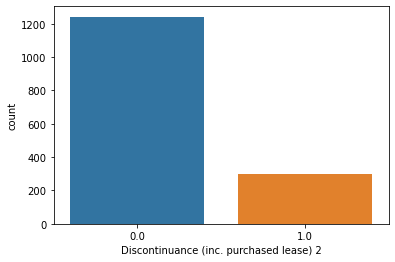

In [422]:
import seaborn as sns
y = df['Discontinuance (inc. purchased lease) 2']
sns.countplot(x = y, data = df)

In [382]:
df['Survey_completion'].value_counts()

 40.0    1723
 16.0      46
 17.0      26
 11.0      17
 10.0      16
 19.0      13
 18.0      11
 23.0      10
 13.0       8
 32.0       7
 20.0       7
 28.0       5
 12.0       5
 33.0       5
 27.0       4
 25.0       4
 31.0       4
 38.0       4
 15.0       4
 29.0       4
 6.0        3
 2.0        3
 3.0        2
 8.0        2
 37.0       2
 7.0        2
 24.0       2
 1.0        2
 39.0       1
 21.0       1
-1.0        1
 30.0       1
 34.0       1
 14.0       1
Name: Survey_completion, dtype: int64

In [383]:
#dropping survey's that were mainly incomplete
df.drop(df.index[df['Survey_completion'] < 30], inplace = True)
df['Survey_completion'].value_counts()

40.0    1723
32.0       7
33.0       5
31.0       4
38.0       4
37.0       2
30.0       1
39.0       1
34.0       1
Name: Survey_completion, dtype: int64

In [384]:
df['Public charging'].fillna('No charging', inplace = True)
df['Work charging (L1, L2, DC, none)'].fillna('No charging', inplace = True)
df['Home Charging (L1, L2, None)'].fillna('No charging', inplace = True)
df['Second_vehicle'] = np.where((df.Second_vehicle.isnull()), 0, 1)
df = df.dropna(subset=['Household_income', 'Oneway_commute_dist'])

missing_values_table(df)

Your selected dataframe has 21 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Age,17,1.1


In [385]:
print(df.shape)
df['Household_income'].value_counts()

(1539, 21)


$150,000 to $199,999      282
$100,000 to $149,999      273
I prefer not to answer    227
$200,000 to $249,999      180
$50,000 to $99,999        162
$250,000 to $299,999      113
$500,000 or more          106
$300,000 to $349,999       67
$350,000 to $399,999       51
Less than $50,000          34
$400,000 to $449,999       26
$450,000 to $499,999       18
Name: Household_income, dtype: int64

In [386]:
#get mask of I prefer not to answer
null_hhincome = df['Household_income'].isin(['I prefer not to answer'])
#count rows with no answer
hl = null_hhincome.sum()
#create array with size l
rand_hhincome = np.random.choice(a=['$150,000 to $199,999', '$100,000 to $149,999', 
                                    '$200,000 to $249,999', '$50,000 to $99,999',
                                    '$250,000 to $299,999', '$500,000 or more',
                                    '$300,000 to $349,999', '$350,000 to $399,999'],
                                 p=[0.275, 0.208, 0.137, 0.123, 
                                    0.086, 0.081, 0.051, 0.039],
                                 size=hl)
#set values
df.loc[null_hhincome, 'Household_income'] = rand_hhincome
df['Household_income'].value_counts()

$150,000 to $199,999    340
$100,000 to $149,999    325
$200,000 to $249,999    210
$50,000 to $99,999      187
$250,000 to $299,999    130
$500,000 or more        127
$300,000 to $349,999     83
$350,000 to $399,999     59
Less than $50,000        34
$400,000 to $449,999     26
$450,000 to $499,999     18
Name: Household_income, dtype: int64

In [387]:
print(df.shape)
print(df['Age'].isnull().sum())
df['Age'].value_counts()

(1539, 21)
17


55.0    400
45.0    365
65.0    350
75.0    180
35.0    178
80.0     27
25.0     21
18.0      1
Name: Age, dtype: int64

In [388]:
#get mask of NaNs
null_age = df['Age'].isnull()
#count rows with NaNs
al = null_age.sum()
#create array with size l
rand_age = np.random.choice(a=[55, 45, 65, 75, 35, 80, 25],
                            p=[0.263, 0.240, 0.230, 0.118,
                              0.117, 0.018, 0.014],
                            size=al)
#set NaNs values
df.loc[null_age, 'Age'] = rand_age
df['Age'].value_counts()

55.0    403
45.0    371
65.0    354
75.0    183
35.0    178
80.0     28
25.0     21
18.0      1
Name: Age, dtype: int64

In [389]:
print(df.shape)
print(df['Gender'].isin(['Decline to state']).sum())
df['Gender'].value_counts()

(1539, 21)
14


Male                      1148
Female                     376
Decline to state            14
TransFemale/Transwoman       1
Name: Gender, dtype: int64

In [390]:
#get mask of Decline to state
no_gender = df['Gender'].isin(['Decline to state'])
#count rows with NaNs
gl = no_gender.sum()
#create array with size l
rand_gender = np.random.choice(['Male', 'Female'], p=[0.753, 0.247], size=gl)
#set values
df.loc[no_gender, 'Gender'] = rand_gender
df.loc[df['Gender'].isin(['TransFemale/Transwoman']), 'Gender'] = 'Female'
df['Gender'].value_counts()

Male      1158
Female     381
Name: Gender, dtype: int64

In [391]:
df.loc[df['Public charging'].isin(['Level 1 & DC Fast', 'Level 2 & DC Fast', 'Level 1, Level 2 & DC Fast']), 'Public charging'] = 'DC Fast'
df.loc[df['Public charging'].isin(['Level 1 & Level 2']), 'Public charging'] = 'Level 2'
df['Public charging'].value_counts()

No charging    1073
Level 2         301
DC Fast         129
Level 1          36
Name: Public charging, dtype: int64

# Data Encoding

In [392]:
from sklearn.preprocessing import OrdinalEncoder

Ordinal = OrdinalEncoder(categories=[['Continued', 'Discontinued']])
df['Discontinuance (inc. purchased lease) 2'] = Ordinal.fit_transform(df[['Discontinuance (inc. purchased lease) 2']])

Ordinal = OrdinalEncoder(categories=[['No Charging', 'Level 1', 'Level 2']])
df['Home Charging (L1, L2, None)'] = Ordinal.fit_transform(df[['Home Charging (L1, L2, None)']])

Ordinal = OrdinalEncoder(categories=[['No charging', 'Level 1', 'Level 2', 'DC Fast']])
df['Work charging (L1, L2, DC, none)'] = Ordinal.fit_transform(df[['Work charging (L1, L2, DC, none)']])

Ordinal = OrdinalEncoder(categories=[['No charging', 'Level 1', 'Level 2', 'DC Fast']])
df['Public charging'] = Ordinal.fit_transform(df[['Public charging']])

Ordinal = OrdinalEncoder(categories=[['Less than $50,000', '$50,000 to $99,999', '$100,000 to $149,999',
                                      '$150,000 to $199,999', '$200,000 to $249,999', '$250,000 to $299,999',
                                      '$300,000 to $349,999', '$350,000 to $399,999', '$400,000 to $449,999',
                                      '$450,000 to $499,999', '$500,000 or more']])
df['Household_income'] = Ordinal.fit_transform(df[['Household_income']])

Ordinal = OrdinalEncoder(categories=[['BEV', 'PHEV']])
df['oldcartype'] = Ordinal.fit_transform(df[['oldcartype']])

Ordinal = OrdinalEncoder(categories=[['Male', 'Female']])
df['Gender'] = Ordinal.fit_transform(df[['Gender']])

df.head()

,"﻿""id. Response ID""",Electric driving range,oldcartype,Discontinuance (inc. purchased lease) 2,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,...,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)",Survey_completion
0,1.0,81.0,1.0,0.0,25.0,0.0,13.92,0.0,5.0,5.0,...,5.0,5.0,5.0,3.0,0.0,0.0,2.0,1,1.0,40.0
6,7.0,87.0,0.0,0.0,35.0,0.0,8.54,0.0,2.0,3.0,...,4.0,1.0,3.0,1.0,1.0,0.0,2.0,1,1.0,40.0
10,12.0,81.0,1.0,0.0,55.0,0.0,9.43,0.0,4.0,5.0,...,5.0,2.0,3.0,2.0,2.0,1.0,0.0,1,1.0,40.0
11,13.0,84.0,0.0,0.0,35.0,0.0,16.32,0.0,5.0,5.0,...,5.0,2.0,4.0,3.0,1.0,1.0,2.0,0,1.0,40.0
22,23.0,84.0,0.0,0.0,75.0,0.0,19.89,0.0,4.0,5.0,...,5.0,2.0,5.0,1.0,2.0,0.0,0.0,1,1.0,40.0


In [393]:
df.drop(df.columns[[0,20]], axis=1, inplace=True)
df.head()

,Electric driving range,oldcartype,Discontinuance (inc. purchased lease) 2,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,Environmental impacts,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)"
0,81.0,1.0,0.0,25.0,0.0,13.92,0.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,0.0,0.0,2.0,1,1.0
6,87.0,0.0,0.0,35.0,0.0,8.54,0.0,2.0,3.0,3.0,4.0,1.0,3.0,1.0,1.0,0.0,2.0,1,1.0
10,81.0,1.0,0.0,55.0,0.0,9.43,0.0,4.0,5.0,5.0,5.0,2.0,3.0,2.0,2.0,1.0,0.0,1,1.0
11,84.0,0.0,0.0,35.0,0.0,16.32,0.0,5.0,5.0,5.0,5.0,2.0,4.0,3.0,1.0,1.0,2.0,0,1.0
22,84.0,0.0,0.0,75.0,0.0,19.89,0.0,4.0,5.0,5.0,5.0,2.0,5.0,1.0,2.0,0.0,0.0,1,1.0


# Normalization 

In [395]:
#scaler? 
df2 = (df-df.min())/(df.max()-df.min())
df2.head()

,Electric driving range,oldcartype,Discontinuance (inc. purchased lease) 2,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,Environmental impacts,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)"
0,0.234114,1.0,0.0,0.112903,0.0,0.006951,0.0,1.00,1.0,1.0,1.00,1.00,1.00,0.3,0.0,0.000000,0.666667,1.0,1.0
6,0.254181,0.0,0.0,0.274194,0.0,0.004251,0.0,0.25,0.5,0.5,0.75,0.00,0.50,0.1,0.5,0.000000,0.666667,1.0,1.0
10,0.234114,1.0,0.0,0.596774,0.0,0.004698,0.0,0.75,1.0,1.0,1.00,0.25,0.50,0.2,1.0,0.333333,0.000000,1.0,1.0
11,0.244147,0.0,0.0,0.274194,0.0,0.008155,0.0,1.00,1.0,1.0,1.00,0.25,0.75,0.3,0.5,0.333333,0.666667,0.0,1.0
22,0.244147,0.0,0.0,0.919355,0.0,0.009947,0.0,0.75,1.0,1.0,1.00,0.25,1.00,0.1,1.0,0.000000,0.000000,1.0,1.0


In [396]:
df2.columns

Index(['Electric driving range', 'oldcartype',
       'Discontinuance (inc. purchased lease) 2', 'Age', 'Gender',
       'Oneway_commute_dist', 'Long_trip_num', 'Safety',
       'Refuelling/Recharging costs', 'Environmental impacts', 'Reliability',
       'Electric driving range.1', 'Convenience of charging',
       'Household_income', 'Home Charging (L1, L2, None)',
       'Work charging (L1, L2, DC, none)', 'Public charging', 'Second_vehicle',
       'Lease (1 lease, 0 other)'],
      dtype='object')

In [400]:
cols_final =['Electric driving range', 'oldcartype',
       'Age', 'Gender',
       'Oneway_commute_dist', 'Long_trip_num', 'Safety',
       'Refuelling/Recharging costs', 'Environmental impacts', 'Reliability',
       'Electric driving range.1', 'Convenience of charging',
       'Household_income', 'Home Charging (L1, L2, None)',
       'Work charging (L1, L2, DC, none)', 'Public charging', 'Second_vehicle',
       'Lease (1 lease, 0 other)', 'Discontinuance (inc. purchased lease) 2']
df2 = df2.reindex(columns=cols_final)
df2.head()

,Electric driving range,oldcartype,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,Environmental impacts,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)",Discontinuance (inc. purchased lease) 2
0,0.234114,1.0,0.112903,0.0,0.006951,0.0,1.00,1.0,1.0,1.00,1.00,1.00,0.3,0.0,0.000000,0.666667,1.0,1.0,0.0
6,0.254181,0.0,0.274194,0.0,0.004251,0.0,0.25,0.5,0.5,0.75,0.00,0.50,0.1,0.5,0.000000,0.666667,1.0,1.0,0.0
10,0.234114,1.0,0.596774,0.0,0.004698,0.0,0.75,1.0,1.0,1.00,0.25,0.50,0.2,1.0,0.333333,0.000000,1.0,1.0,0.0
11,0.244147,0.0,0.274194,0.0,0.008155,0.0,1.00,1.0,1.0,1.00,0.25,0.75,0.3,0.5,0.333333,0.666667,0.0,1.0,0.0
22,0.244147,0.0,0.919355,0.0,0.009947,0.0,0.75,1.0,1.0,1.00,0.25,1.00,0.1,1.0,0.000000,0.000000,1.0,1.0,0.0


# Splitting Data

In [419]:
df2 = df2.astype({'Discontinuance (inc. purchased lease) 2': 'int64'})
arr = np.array(df2)
X = arr[:,0:-1]
Y= arr[:,-1]
print(arr.shape)
print(X.shape)
print(Y.shape)
print(df2.dtypes)
(unique, counts) = np.unique(Y, return_counts=True)
print(unique, counts)

(1539, 19)
(1539, 18)
(1539,)
Electric driving range                     float64
oldcartype                                 float64
Age                                        float64
Gender                                     float64
Oneway_commute_dist                        float64
Long_trip_num                              float64
Safety                                     float64
Refuelling/Recharging costs                float64
Environmental impacts                      float64
Reliability                                float64
Electric driving range.1                   float64
Convenience of charging                    float64
Household_income                           float64
Home Charging (L1, L2, None)               float64
Work charging (L1, L2, DC, none)           float64
Public charging                            float64
Second_vehicle                             float64
Lease (1 lease, 0 other)                   float64
Discontinuance (inc. purchased lease) 2      int64
d

In [418]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 245, stratify=Y)
(unique_train, counts_train) = np.unique(Y_train, return_counts=True)
print(unique_train, counts_train)
(unique_test, counts_test) = np.unique(Y_test, return_counts=True)
print(unique_test, counts_test)

[0. 1.] [869 208]
[0. 1.] [373  89]


In [421]:
np.save('Data/X_train', X_train)
np.save('Data/X_test', X_test)
np.save('Data/Y_train', Y_train)
np.save('Data/Y_test', Y_test)

# OverSampling Training Data

## SMOTE

In [2]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
import numpy as np
# define dataset
X = np.load('Data/X_train.npy')
y = np.load('Data/Y_train.npy')
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0.0: 869, 1.0: 208})


Counter({0.0: 869, 1.0: 869})


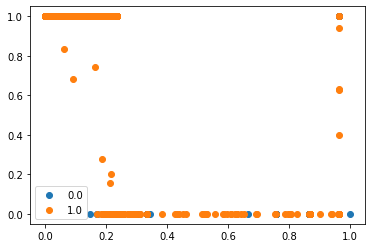

In [3]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [4]:
np.save('Data/X_train_smote', X)
np.save('Data/Y_train_smote', y)

## Borderline SMOTE

In [2]:
# borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where
import numpy as np
# define dataset
X = np.load('Data/X_train.npy')
y = np.load('Data/Y_train.npy')
# summarize class distribution
counter = Counter(y)
print(counter)


Counter({0.0: 869, 1.0: 208})


Counter({0.0: 869, 1.0: 869})


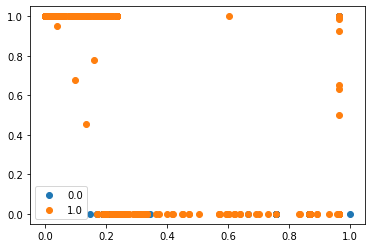

In [3]:
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [5]:
np.save('Data/X_train_borderline_smote', X)
np.save('Data/Y_train_borderline_smote', y)

## ADASYN

In [1]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
import numpy as np
# define dataset
X = np.load('Data/X_train.npy')
y = np.load('Data/Y_train.npy')
# summarize class distribution
counter = Counter(y)
print(counter)


Counter({0.0: 869, 1.0: 208})


Counter({0.0: 869, 1.0: 817})


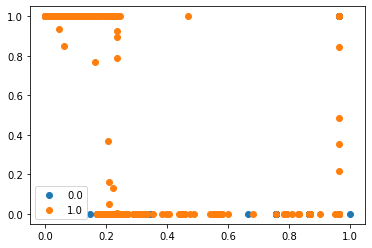

In [2]:
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [3]:
np.save('Data/X_train_adasyn', X)
np.save('Data/Y_train_adasyn', y)